##### Data Analysis - Coursework 2 (50%)
# Analysing gravitational wave signals
## Deadline Thursday week 11, 2pm.

#### Instructions

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 50% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2022/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework.

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a PDF file. **Don't forget to click `run all` before you export it**. You can constantly update this document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbook.

#### Tips


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You may find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

I was having trouble uploading the csv files to colab as they were either taking forever to upload or just didnt upload. Therefoire, I have created a public GitHub repository to contain them and call them here.

In [1]:
#Only run omce so multiple files aren
!wget https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/gravitationalwaveresults.csv
!wget https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/Observedwaveform.csv
!wget https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/reference_Mtot40Msun_Dist1Mpc.csv
!wget https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/mockData_Mtot40Msun_Dist1Mpc.csv
!wget https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/mockData_Mtot70Msun_Dist5Mpc.csv

--2023-12-13 00:12:23--  https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/gravitationalwaveresults.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1857 (1.8K) [text/plain]
Saving to: ‘gravitationalwaveresults.csv’

gravitationalwavere 100%[===================>]   1.81K  --.-KB/s    in 0s      

2023-12-13 00:12:23 (14.2 MB/s) - ‘gravitationalwaveresults.csv’ saved [1857/1857]

--2023-12-13 00:12:23--  https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/Observedwaveform.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting resp

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import signal
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import pandas as pd

%matplotlib inline

## Part A - Some background [15 marks]

**Answer:**

Your answer here

1. Astronomers know that the gravitational wave signal from the GW150914 event was due to two black holes merging. They proved this in the paper[
The basic physics of the binary black hole merger GW150914](https://arxiv.org/pdf/1608.01940.pdf). At first they assumed the masses were equal. They found the mass of each unknown object to be $35{M}_\odot$. Due to the high nature of the Mass there are few objects the merging bodies could take the form of. Below are 3 papers that give different upper limits for the mass of Neutron Stars. The first two$^{[1][2]}$ give mass limits of $3.2{M}_\odot$ and the last one$^{[3]}$ gives a mass limit of $2.9{M}_\odot$. This gives an average mass of approximately $3.1{M}_\odot$. Since $35{M}_\odot>3.1{M}_\odot$ we can say that for a mass ratio q of 1 the objects must be Black Holes. The next case is unequal masses. [They](https://arxiv.org/pdf/1608.01940.pdf) found in the above link that a mass ratio of $q=13$ is the hard limit for the system because any higher and the Schwarzschild radius of the objects will be inside the Schwarzschild radius of the other. This limit of $q=13$ means the smaller object would have a mass of $11{M}_\odot$. Since $11{M}_\odot>3.1{M}_\odot$ the two bodies must be Black Holes in this Scenario too. The last case takes spinning objects. [They](https://arxiv.org/pdf/1608.01940.pdf) found the upper limit of the mass ratio to be 83. This gives a limit to the lower mass object of $5{M}_\odot$. Since $5{M}_\odot>3.1{M}_\odot$ the objects in this case are also Black Holes. To summarise since the Masses are greater than the upper limit of a Neutron Star the objects must be Black Holes.

[1] C. E. Rhoades Jr, and R. Ruffini, Phys. Rev. Lett. 32,
324–327 (1974).

[2] M. Hannam, D. A. Brown, S. Fairhurst, C. L. Fryer, and
I. W. Harry, Astrophys. J. 766, L14 (2013).

[3] V. Kalogera and G. Baym, Astrophys. J. 470, L61–L64
(1996).

2. The Waveform of a Gravitational Wwave has 3 parts. Before the Black Hole merger, The Black Hole merger and after the Black Hole merger. Before the Black Hole merger There are Black Holes at a certain distance apart from one another. They have become gravitationally bound somehow and due to this they begin falling towards each other. Because they are likely to have some velocity through spacetime they have angular momentum. This is a comserved quantity. As they fall towards each other they begin to orbit around each other. r decrease due to the gravitational attraction and since $L=mrv$, the velocity must increase to keep Angular momentum constant (assuming mass is constant). This can be seen on the waveform because at more negative times in figure 2 the longer the period is. This increase in orbital velocity causes gravitational waves that warp spacetime. They can be observed on Earth by using Michelson interferometers that measure the difference in phase between two laser beams. This allows us to calculate a strain represented on the waveform as amplitude. This strain increases as the two Black Holes seperation decreases. At the merger event the stored up energy is dissipated in one large gravitational wave, hence the peak in amplitude at $t=0$ (and just after merger time also). After the merger event there are no more Gravitational waves and what we see in Figure 2 is Background noise from something else.

In [3]:
GR = pd.read_csv('gravitationalwaveresults.csv') # reading in file using pandas

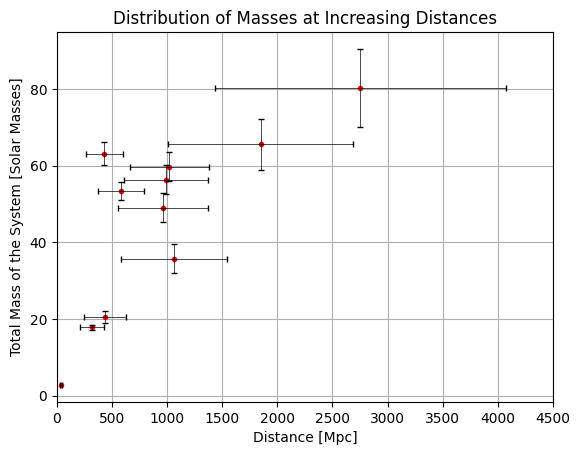

In [4]:
plt.figure(1)
plt.plot(GR['DL'], GR['Mtot'], 'ro', markersize = "3") # Plotting the observed merger events masses against distance
plt.errorbar(GR['DL'], GR['Mtot'], xerr=GR['DL_err'], yerr=GR['Mtot_err'], ls='None', ecolor='k', elinewidth=0.5, capsize=2, capthick=1) # Plotting errorbars
plt.xlabel('Distance [Mpc]')
plt.ylabel('Total Mass of the System [Solar Masses]')
plt.title('Distribution of Masses at Increasing Distances')
plt.xlim(0, 4500) # Becuase the errorbars force the graph to be wider than needed
plt.grid()
plt.show()

***

## Part B - The data [15 marks]

**Answer:**

Your answer here

In [5]:
OW = pd.read_csv('Observedwaveform.csv') # reading in file using pandas

GPS time is very similar to Julian Dates. It represents the amount of time since midnight on January $6^{th}$ 1980. One simply subtracts the amount of time since then to get time in the units you desire.

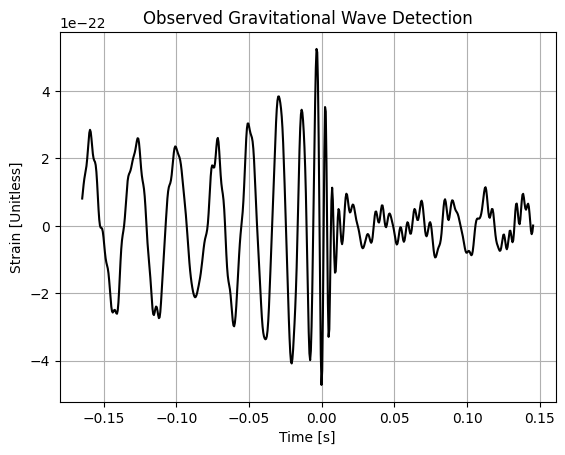

In [6]:
O_time = np.array(OW['time (s)']) - 1205951542.15336#seconds from the start of GPS time to merger event. # Correcting for GPS time
O_strain = np.array(OW['strain']) # unitless (remember from Youngs modulus)

plt.figure(2)
plt.plot(O_time, O_strain, 'k-') # plotting Observed strain against time in seconds
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title('Observed Gravitational Wave Detection')
plt.grid()
plt.show()

The merger event happens at $t=0$. There is still data from the gravitational wave for a small fraction of time after the merger event. I estimate that at around 0.015 seconds after the Black Holes nerge the Signal from the merger is 0. i.e there should be a strain of 0. Since we still have strain, it must be due to noise.

In [7]:
sel = O_time > 0.015 # Taking data only after time 0.015s
Noise = O_strain[sel] # Applying this selection to strain
t_red = O_time[sel] # Applying this selection to time

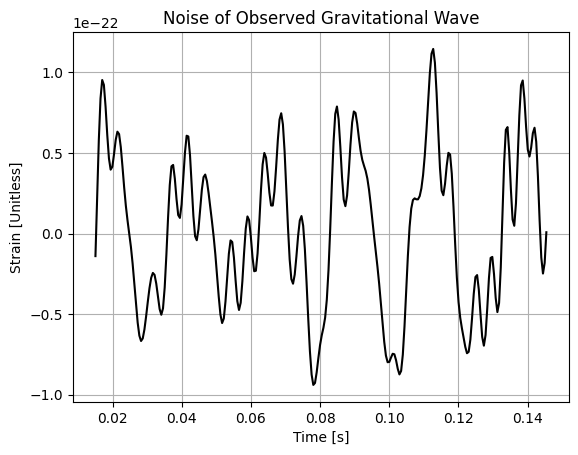

In [8]:
plt.figure(3)
plt.plot(t_red, Noise, 'k-') # Plotting Only the Noise of the Observed GW
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Noise of Observed Gravitational Wave")
plt.grid()
plt.show()

In [9]:
mu_N = np.mean(Noise)
sigma_N = np.std(Noise)

print('The mean Noise of the Observed GW is {:.2e} unitless'.format(mu_N))
print("The standard deviation of the Noise for the Observed GW is {:.2e} unitless".format(sigma_N))

The mean Noise of the Observed GW is 3.70e-24 unitless
The standard deviation of the Noise for the Observed GW is 4.85e-23 unitless


Noise can be considered a random natural event. Natural events are known to follow normal distributions, like the lengths of tree branches on a tree. I will plot below a normal distribution for the mean and standard deviation as shown above to test this.

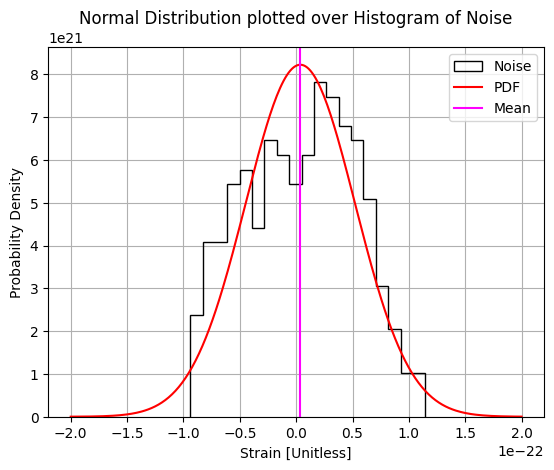

In [10]:
rang = np.linspace(-2E-22, 2E-22, len(Noise)) # linspace for x coords of normal distribution
p = stats.norm.pdf(rang, mu_N, sigma_N) # PDF for Noise (assumption)

plt.figure(4)
plt.hist(Noise, bins=19, density=True, histtype='step', color='black', label='Noise') # Noise Data plotted as a histogram
plt.plot(rang, p, 'r-', label='PDF') # PDF Assumption
plt.xlabel('Strain [Unitless]')
plt.ylabel('Probability Density')
plt.title("Normal Distribution plotted over Histogram of Noise")
plt.axvline(mu_N, color='magenta', label='Mean')
plt.legend(loc='best')
plt.grid()
plt.show()

The PDF above visually fits the Noise quite well. It is because of that that i will assume the Noise takes the form of a Normal distribution so that the standard devuation can be described as an error in the mean:

$$\mu\pm\sigma$$

(This is important for the MCMC later)

In [11]:
print('The mean Noise of the Observed GW is {:.2e} +/- {:.2e} unitless'.format(mu_N, sigma_N))

The mean Noise of the Observed GW is 3.70e-24 +/- 4.85e-23 unitless


Below I have attempted to fit a curve to the noise in hopes of being able to subtract it off. It has not worked well. To improve i would need to include more Sinusoids in my Fourier Transforms.

I have plotted a Power Spectrum Densioty graph (with a logged y-axis). This is less pretty so to the right of it i have also plotted the normal unlogged version. The logged version is the more usefuk one though.

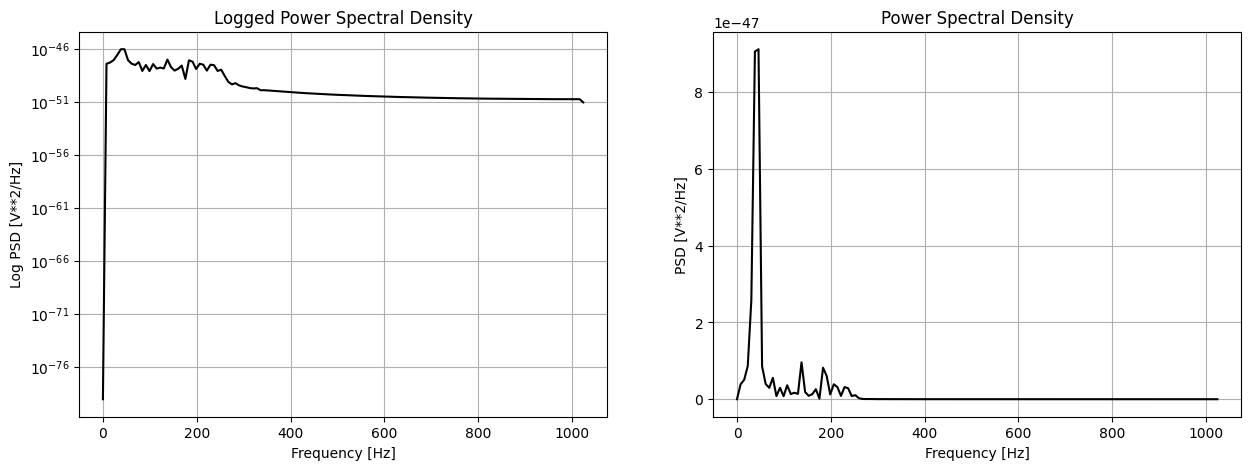

In [12]:
fs = 1 / (t_red[1] - t_red[0]) # Converting reduced time to frequencies
f, Psd = signal.periodogram(Noise, fs) # Using scipy.signal to plot the peaks at given frequencies

plt.figure(3, figsize=(15,5))
plt.subplot(121)
plt.semilogy(f, Psd, 'k-') # Plotting the Power Spectrum Density Graph in log form
plt.xlabel('Frequency [Hz]')
plt.ylabel('Log PSD [V**2/Hz]')
plt.title("Logged Power Spectral Density")
plt.grid()

plt.subplot(122)
plt.plot(f, Psd, 'k-') # Plotting the Power Spectrum Density Graph
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.title("Power Spectral Density")
plt.grid()
plt.show()

Using the fact that the peaks of the above gaph correspond to the frequencies of the sine waves that make up the fourier transform. I created a function that adds these sine waves together and used curve fit with some guesses that included the frequencies of above peaks to fit the data.

In [13]:
def Sinusoid(t, w1, A1, phi1, w2, A2, phi2, w3, A3, phi3, w4, A4, phi4, w5, A5, phi5, c): # Fourier Transform
    S1 = A1*np.cos(w1*t + phi1) # These are the Sine waves that make up the fit at the end
    S2 = A2*np.cos(w2*t + phi2)
    S3 = A3*np.cos(w3*t + phi3)
    S4 = A4*np.cos(w4*t + phi4)
    S5 = A5*np.cos(w5*t + phi5)
    return S1 + S2 + S3 + S4 + S5 + c # returns the addition of the above waves
# Need more waves to make a better fit

p_init = np.array([42, 2.5E-22, 1, 138, 1E-23, 1, 183, 1E-22, 1, 1000, 1E-23, 1, 300, 1E-22, 1, 1]) # Initial guesses from the PSD and Noise Graph
popt, pcov = curve_fit(f=Sinusoid, xdata=t_red, ydata=Noise, p0=p_init) # Gives optimal values as well as the covarience

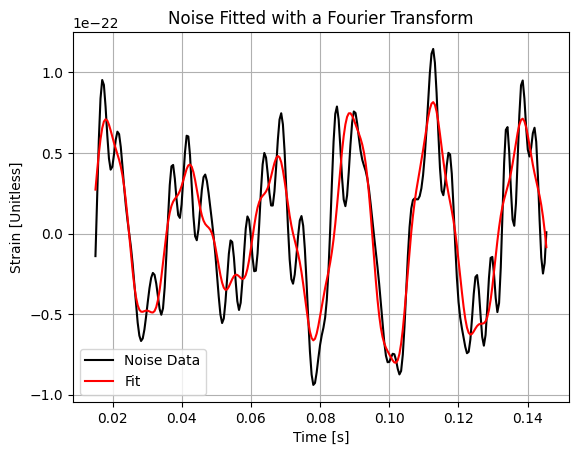

In [14]:
plt.figure(4)
plt.plot(t_red, Noise, 'k-', label='Noise Data') # Observed Noise
plt.plot(t_red, Sinusoid(t_red, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8], popt[9], popt[10], popt[11], popt[12], popt[13], popt[14], popt[15]), 'r', label='Fit') # Plotted fit curve
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Noise Fitted with a Fourier Transform")
plt.grid()
plt.legend(loc='best')
plt.show()

***

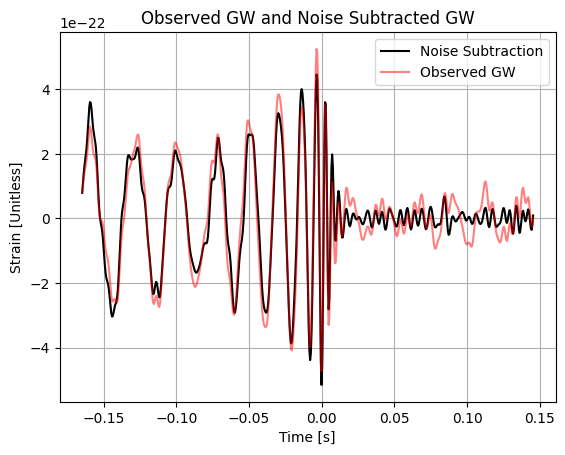

In [15]:
#Attempted Noise Subtraction
noise = Sinusoid(O_time, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8], popt[9], popt[10], popt[11], popt[12], popt[13], popt[14], popt[15])
Signal = O_strain - noise

plt.figure(5)
plt.plot(O_time, Signal, 'k-', label='Noise Subtraction')
plt.plot(O_time, O_strain, 'r-', label='Observed GW', alpha=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Observed GW and Noise Subtracted GW")
plt.legend(loc='best')
plt.grid()
plt.show()

## Part C - Interpolate reference model to match the observed data time sampling [15 marks]

**Answer:**

Your answer here

In [16]:
mockdata70_5 = pd.read_csv("mockData_Mtot70Msun_Dist5Mpc.csv") # reading in file using pandas
mockdata = pd.read_csv("mockData_Mtot40Msun_Dist1Mpc.csv") # reading in file using pandas
refdata = pd.read_csv('reference_Mtot40Msun_Dist1Mpc.csv') # reading in file using pandas

m_strain = mockdata['strain']
m_time = mockdata['time (s)']
r_strain = refdata['strain']
r_time = refdata['time (s)']
m_strain70_5 = mockdata70_5['strain']
m_time70_5 = mockdata70_5['time (s)']

In [17]:
m_t0 = m_time[m_time < 0]
m_h0 = m_strain[m_time < 0]

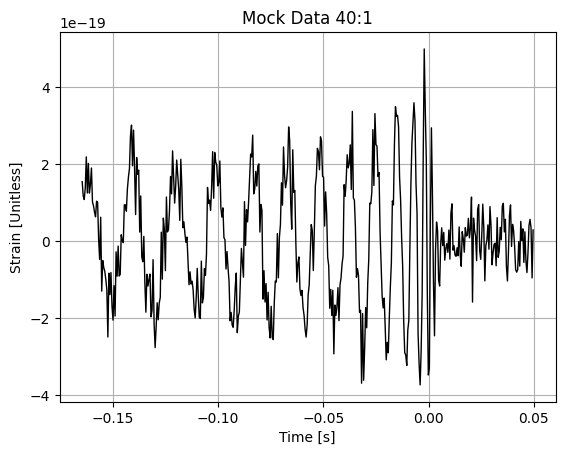

In [18]:
plt.figure(6)
plt.plot(m_time, m_strain, 'k-', lw=1)
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Mock Data 40:1")
plt.grid()
plt.show()

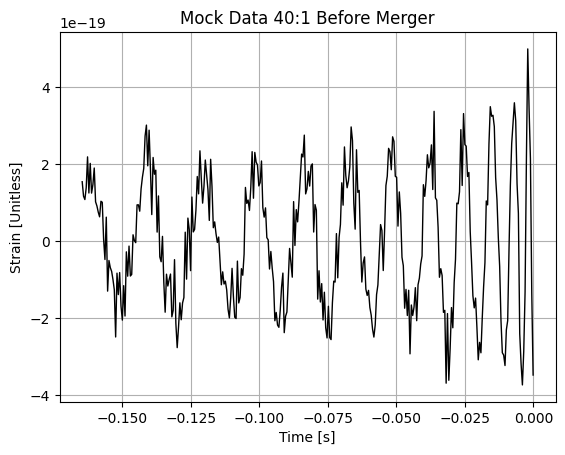

In [19]:
plt.figure(7)
plt.plot(m_t0, m_h0, 'k-', lw=1)
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Mock Data 40:1 Before Merger")
plt.grid()
plt.show()

In [20]:
print(m_t0[0])

-0.1646575927734375


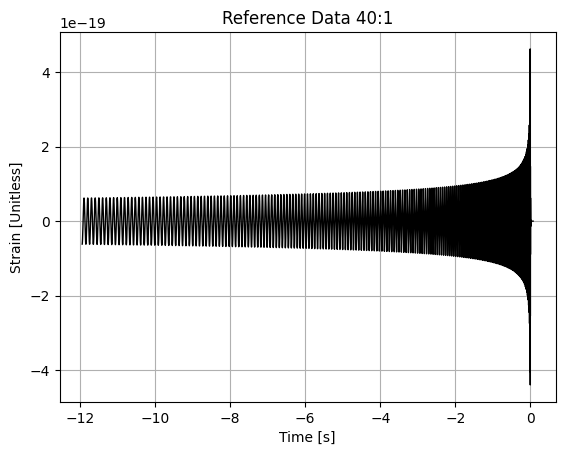

In [21]:
plt.figure(8)
plt.plot(r_time, r_strain, 'k-', lw = 1)
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Reference Data 40:1")
plt.grid()
plt.show()

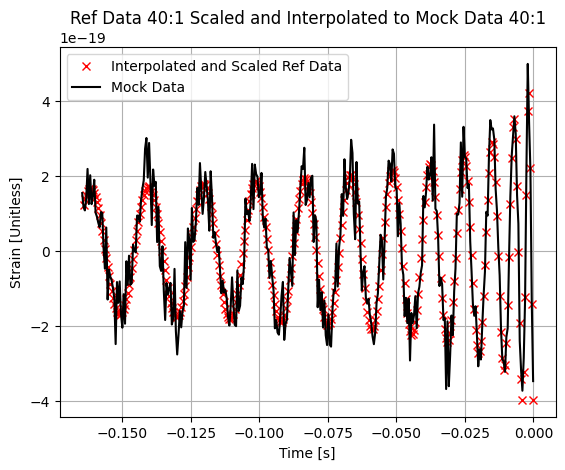

In [22]:
index = r_time > -0.1646575927734375
plt.figure(9)
f = interp1d(r_time[index], r_strain[index], bounds_error=False)
interp_strain = f(m_t0)
plt.plot(m_t0, interp_strain, 'rx', label='Interpolated and Scaled Ref Data')
plt.plot(m_t0, m_h0, 'k-', label='Mock Data')
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Ref Data 40:1 Scaled and Interpolated to Mock Data 40:1")
plt.legend(loc='best')
plt.grid()
plt.show()

In [23]:
print(len(interp_strain))
print(len(m_h0))

338
338


***

## Part D - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") [24 marks]

**Answer**

Your answer here

In [24]:
def GW_merg_param(M, D, t_m, t_r, h_r):
  M_ref = 40 #Solar Masses
  D_ref = 1 #Mpc
  t_mscaled = (M_ref / M) * t_m
  func = interp1d(t_r, h_r, bounds_error=False)
  h_ref = (M / M_ref) * (D_ref / D) * func(t_mscaled)
  return t_m, h_ref

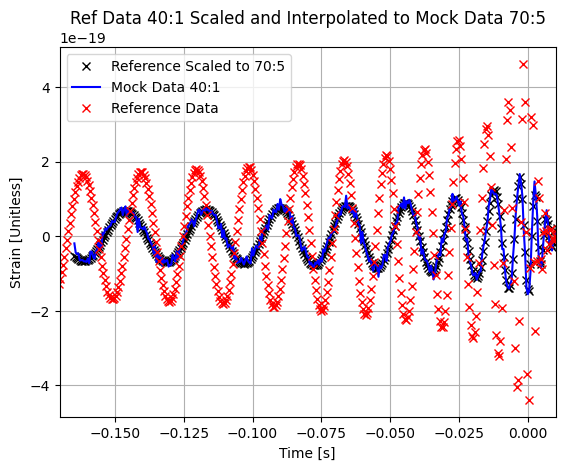

In [25]:
plt.figure(10)
a = GW_merg_param(70, 5, m_time70_5, r_time, r_strain)
plt.plot(a[0], a[1], 'kx', label='Reference Scaled to 70:5')
plt.plot(m_time70_5, m_strain70_5, 'b-', label='Mock Data 40:1')
plt.plot(r_time, r_strain, 'rx', label='Reference Data')
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Ref Data 40:1 Scaled and Interpolated to Mock Data 70:5")
plt.xlim(-0.17, 0.01)
plt.legend(loc='best')
plt.grid()
plt.show()

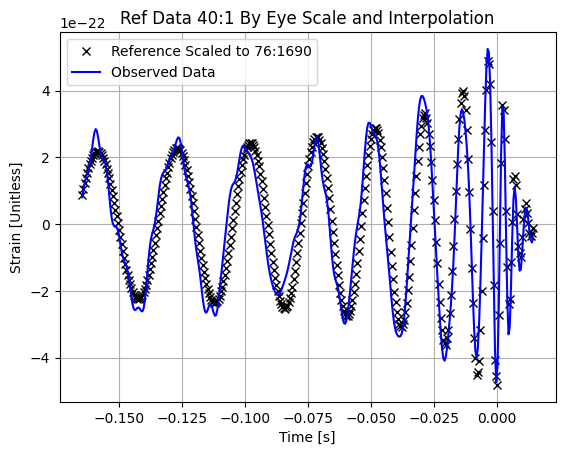

In [26]:
obs = GW_merg_param(76, 1690, O_time[O_time < 0.015], r_time, r_strain)

plt.figure(11)
plt.plot(obs[0], obs[1], 'kx', label='Reference Scaled to 76:1690')
plt.plot(O_time[O_time < 0.015], O_strain[O_time < 0.015], 'b-', label='Observed Data')
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Ref Data 40:1 By Eye Scale and Interpolation")
plt.legend(loc='best')
plt.grid()
plt.show()

***

## Part E - Estimating the total mass using MCMC [75 marks]

**Answer:**

Your answer here

In [27]:
def functional_form(t_m, M, D, t_r, h_r):
    M_ref = 40 #Solar Masses
    D_ref = 1 #Mpc
    t_mscaled = (M_ref / M) * t_m
    func = interp1d(t_r, h_r, bounds_error=False)
    return (M / M_ref) * (D_ref / D) * func(t_mscaled)

In [28]:
O_t_red = O_time[O_time < 0]
O_h_red = O_strain[O_time < 0]

In [29]:
# MCMC
steps = 100000
th_c_M = np.zeros(steps + 1)
th_c_M[0] = 76
stp_siz_M = 0.1
th_c_D = np.zeros(steps + 1)
th_c_D[0] = 1690
stp_siz_D = 50

def log_lik(M, D):
    Noise = sigma_N
    log_l = -0.5*np.sum((O_h_red - functional_form(O_t_red, M, D, r_time, r_strain))**2) / Noise**2
    return log_l

def posterior(M, D):
    prior = 1 # uniform prior
    pos = log_lik(M, D) * prior
    return pos

for i in range(steps):
    pos_c = posterior(th_c_M[i], th_c_D[i])
    d_th_M = np.random.normal(0, stp_siz_M)
    d_th_D = np.random.normal(0, stp_siz_D)
    th_prop_M = th_c_M[i] + d_th_M
    th_prop_D = th_c_D[i] + d_th_D
    pos_prop = posterior(th_prop_M, th_prop_D)

    if pos_prop > pos_c:
        th_c_M[i + 1] = th_prop_M
        th_c_D[i + 1] = th_prop_D
    else:
        p_nu_stp = pos_prop - pos_c #both log so subtract not divide
        tru_pos = np.exp(p_nu_stp)
        rand = np.random.uniform(0, 1)
        if rand <= tru_pos: # compare to actual posterior here
            th_c_M[i + 1] = th_prop_M
            th_c_D[i + 1] = th_prop_D
        else:
            th_c_M[i + 1] = th_c_M[i]
            th_c_D[i + 1] = th_c_D[i]

mu_stps_M = np.mean(th_c_M)
std_M = np.std(th_c_M)
mu_stps_D = np.mean(th_c_D)
std_D = np.std(th_c_D)

print('The mean Mass from the MCMC is {:.2f} +/- {:.2f} Solar Masses'.format(mu_stps_M, std_M))
print('The mean Distance from the MCMC is {:.2f} +/- {:.2f} Mpc'.format(mu_stps_D, std_D))
#we assumed uniform prior for distance not correct

The mean Mass from the MCMC is 77.01 +/- 0.06 Solar Masses
The mean Distance from the MCMC is 1711.90 +/- 22.28 Mpc


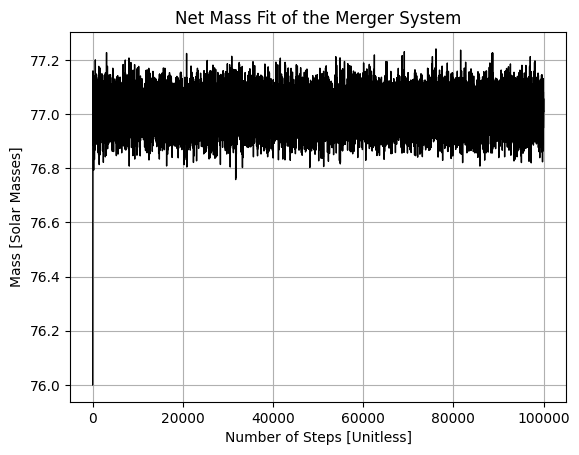

In [30]:
plt.figure(12)
plt.plot(th_c_M, 'k-', lw=1)
plt.xlabel('Number of Steps [Unitless]')
plt.ylabel('Mass [Solar Masses]')
plt.title("Net Mass Fit of the Merger System")
plt.grid()
plt.show()

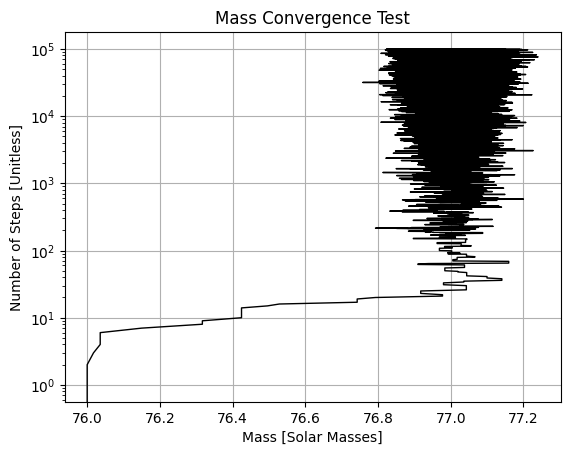

In [31]:
x_mcmc_M = np.linspace(0, steps, steps + 1)

plt.figure()
plt.semilogy(th_c_M, x_mcmc_M, 'k-', lw=1)
plt.xlabel('Mass [Solar Masses]')
plt.ylabel('Number of Steps [Unitless]')
plt.title("Mass Convergence Test")
plt.grid()
plt.show()

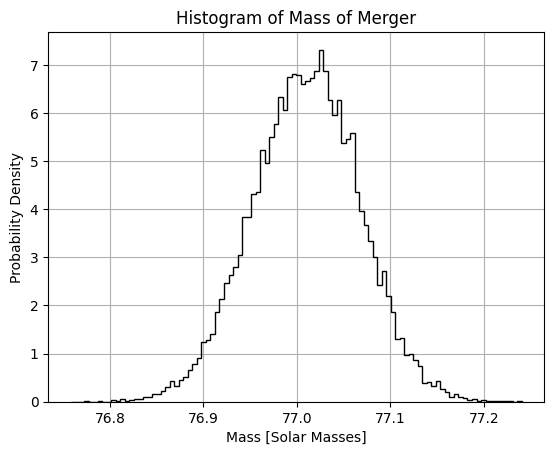

In [32]:
burnin_M = 100
brnt_th_M = th_c_M[burnin_M:]

plt.figure()
plt.hist(brnt_th_M, bins=100, density=True, histtype='step', color='black')
plt.xlabel('Mass [Solar Masses]')
plt.ylabel('Probability Density')
plt.title("Histogram of Mass of Merger")
plt.grid()
plt.show()

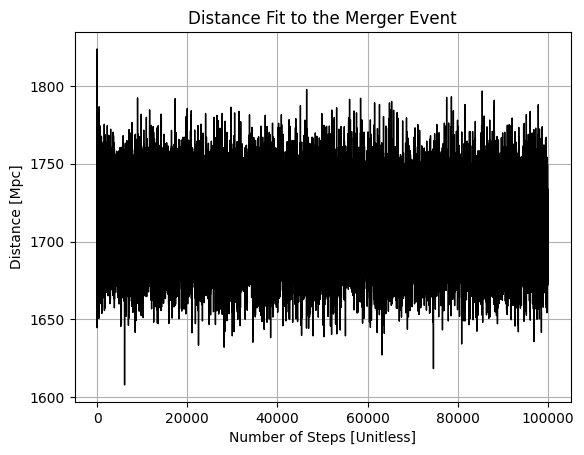

In [33]:
plt.figure(13)
plt.plot(th_c_D, 'k-', lw=1)
plt.xlabel('Number of Steps [Unitless]')
plt.ylabel('Distance [Mpc]')
plt.title("Distance Fit to the Merger Event")
plt.grid()
plt.show()
#comment on the width of the mcmc (error)

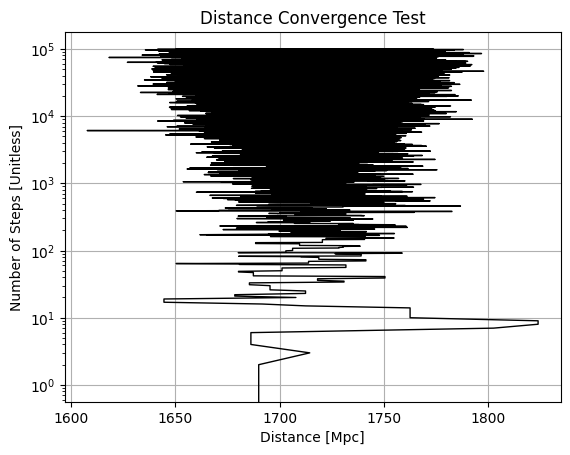

In [34]:
x_mcmc_D = np.linspace(0, steps, steps + 1)

plt.figure()
plt.semilogy(th_c_D, x_mcmc_D, 'k-', lw=1)
plt.xlabel('Distance [Mpc]')
plt.ylabel('Number of Steps [Unitless]')
plt.title("Distance Convergence Test")
plt.grid()
plt.show()

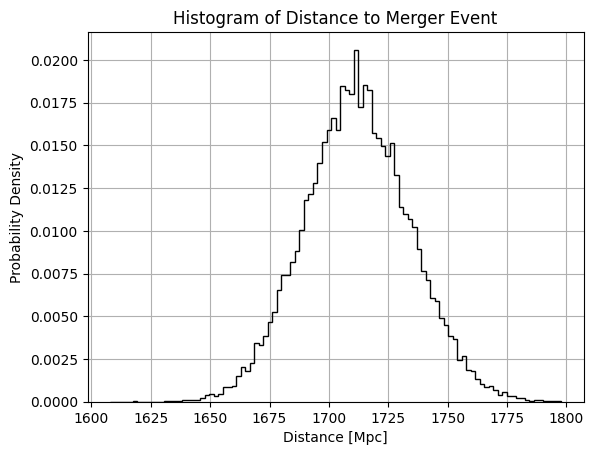

In [35]:
burnin_D = 150
brnt_th_D = th_c_D[burnin_D:]


plt.figure()
plt.hist(brnt_th_D, bins=100, density=True, histtype='step', color='black')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Probability Density')
plt.title("Histogram of Distance to Merger Event")
plt.grid()
plt.show()

***

## Part F - Putting it all together [36 marks]

**Answer:**

Your answer here

In [36]:
M_1 = mu_stps_M / 2 #because we're assuming that the two masses are the same, so each mass is equal to the calculated total mass divided by 2
M_2 = mu_stps_M / 2

M_ch = ((M_1 * M_2)**(3/5)) / ((M_1 + M_2)**(1/5))
print(M_ch)

33.52033797290324


The standard equation for the chirp mass is ((M_1 * M_2)^(3/5))/((M_1 + M_2)^(1/5)). We obtain the total mass of the merger system in part E. Because we're assuming that the two masses are the same, each mass is equal to the calculated total mass divided by 2. From this calculation of the individual masses, we plug them into the standard chirp mass equation to find the chirp mass, that is, the mass lost to gravitational waves.

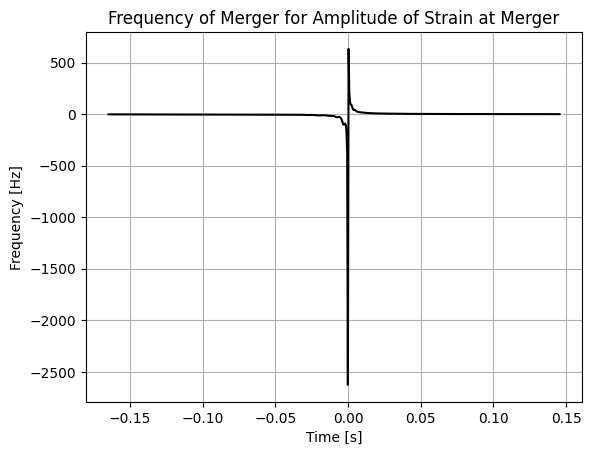

In [37]:
A = (np.max(O_strain) + np.abs(np.min(O_strain))) / 2 # average of the peak amplitude at time of merger
f_gw = ((np.cos(O_strain/(A)))**-1)/(2*np.pi*O_time) #h = Acos(wt) rearranged

plt.figure()
plt.plot(O_time, f_gw, 'k-')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title("Frequency of Merger for Amplitude of Strain at Merger")
plt.grid()
plt.show()

In [38]:
# frequency can only ever be positive
f_merg = f_gw[np.where(np.round(O_time, 3) == 0)] # finds the frequency at time = 0
f_merg = f_merg[f_merg > 0][0] # because of cos we get positive and negative values so this chooses only the positive
print(f_merg)

634.1469763665634


In [39]:
#period
T = 1 / f_merg
print(T)

0.0015769214981196382


In [40]:
M_1_kg = M_1 * 1.99E30
M_2_kg = M_2 * 1.99E30
G = 6.67E-11
R = ((G * (M_1_kg + M_2_kg))/f_merg**2)**(1/3)
print(R)
r = (2*G*M_1*1.99E30) / (3E8**2)
print(r*2)

294022.89355044975
227148.97433853633


***

## Part G - Evidence of Understanding, Presentation and Interpretation [20 marks]

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>